# Universidad de Buenos Aires
# Deep Learning - Examen
# Noviembre 2022



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 18 de diciembre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público” (tanto con los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link).


## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$

(a) Aplicar gradiente e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

(b) Aplicar SGD para encontrar la ubicación del máximo de manera numérica.

a) Gradiente de z = -2(x-2)i - 2(y-3)j . El punto donde z tiene un maximo es en el punto (2,3), con valor 4: -(2-2)^2 - (3-3)^2 + 4 = 4

In [101]:
x = 5
y = 5
z = -(x-2)**2-(y-3)**2+4

In [107]:
x = torch.tensor(2.0,requires_grad=True)
y = torch.tensor(3.0,requires_grad=True)
print(x)
print(y)
z = -(x-2)**2-(y-3)**2+4 
print(z)
z.backward()
print(x.grad)
print(y.grad)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(4., grad_fn=<AddBackward0>)
tensor(-0.)
tensor(-0.)


## Ejercicio 2



En las siguientes imágenes, se presenta la traslación de un objeto en la capa de entrada de una CNN (el 2 de las imágenes inferiores) y las neuronas que se activan a la salida de dicha CNN para 2 tipos de propiedadedes de las CNN: *Invarianza al desplazamiento (translational invariance)* y *equivariancia al desplazamiento (translational equivariance)*.


![a](https://drive.google.com/uc?export=view&id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

Imagen 1




![b](https://drive.google.com/uc?export=view&id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

Imagen 2


Preguntas:
* a) ¿Qué imagen se corresponde con cuál propiedad? 
* b) ¿Cuál/cuáles de cada capa elemental de una CNN (convolución - activación - pooling) aporta cada propiedad?





a) Imagen 1: Invarianza translacional. Imagen 2: Equivarianza translacional

b) La capa de convolucion aporta la equivarianza translacional y la capa de pooling aporta la invarianza translacional.

## Ejercicio 3





Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$ 
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$ 



Hidden state inicializado en 0

$$ h1(t=0) = w_{xh1} * x(t=0) + w_{h1h1} * h1(0) + w_{h2h1} * h2(0)+ bh1 = w_{xh1} * x(t=0) + bh1$$
$$ h2(t=0) = w_{xh2} * x(t=0) + w_{h2h2} * h2(0) + w_{h1h2} * h1(0)+ bh2 = w_{xh2} * x(t=0) + bh2$$

$$ \hat{y}(t=0) = w_{h1y} * h1(t=0) + w_{h2y} * h2(t=0) + by$$

$$ h1(t=1) = w_{xh1} * x(t=1) + w_{h1h1} * h1(t=0) + w_{h2h1} * h2(t=0)+ bh1$$ 
$$ h2(t=1) = w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0)+ bh2 $$ 

$$ \hat{y}(t=1) = w_{h1y} * h1(t=1) + w_{h2y} * h2(t=1) + by$$

$$ h1(t=2) = w_{xh1} * x(t=2) + w_{h1h1} * h1(t=1) + w_{h2h1} * h2(t=1)+ bh1$$ 
$$ h2(t=2) = w_{xh2} * x(t=2) + w_{h2h2} * h2(t=1) + w_{h1h2} * h1(t=1)+ bh2 $$ 

$$ \hat{y}(t=2) = w_{h1y} * h1(t=2) + w_{h2y} * h2(t=2) + by$$


## Ejercicio 4 




Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Compare el score de cada modelo y comente lo necesario.



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("dataset_black_sales.csv")

# Analisis de datos y feature engineering

In [49]:
len(df)

550068

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [52]:
serie=[]
for product_id in df['Product_ID']:
    if product_id[0]=='P':
        product_id=product_id[1:]
        serie.append(int(product_id))
df['Product_ID']=serie

In [53]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [54]:
genero=[]
for gender in df['Gender']:
    if gender=='F':
        genero.append(0)
    elif gender=='M':
        genero.append(1)
df['Gender']=genero
        

In [55]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [56]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [57]:
cleanup_nums = {"Age":     {"0-17": 0, "18-25": 1,"26-35": 2,"36-45": 3,"46-50": 4,"51-55":5,"55+":6}}
df=df.replace(cleanup_nums)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,C,4+,0,8,NaN,NaN,7969
5,1000003,193542,1,2,15,A,3,0,1,2.0,NaN,15227
6,1000004,184942,1,4,7,B,2,1,1,8.0,17.0,19215
7,1000004,346142,1,4,7,B,2,1,1,15.0,NaN,15854
8,1000004,97242,1,4,7,B,2,1,1,16.0,NaN,15686
9,1000005,274942,1,2,20,A,1,1,8,NaN,NaN,7871


In [58]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [59]:
cleanup_nums = {"Stay_In_Current_City_Years":     {"0": 0, "1": 1,"2": 2,"3": 3,"4+": 4,}}
df=df.replace(cleanup_nums)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,C,4,0,8,NaN,NaN,7969
5,1000003,193542,1,2,15,A,3,0,1,2.0,NaN,15227
6,1000004,184942,1,4,7,B,2,1,1,8.0,17.0,19215
7,1000004,346142,1,4,7,B,2,1,1,15.0,NaN,15854
8,1000004,97242,1,4,7,B,2,1,1,16.0,NaN,15686
9,1000005,274942,1,2,20,A,1,1,8,NaN,NaN,7871


In [60]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [61]:
cleanup_nums = {"City_Category":     {"A": 0, "B": 1,"C": 2}}
df=df.replace(cleanup_nums)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,2,4,0,8,NaN,NaN,7969
5,1000003,193542,1,2,15,0,3,0,1,2.0,NaN,15227
6,1000004,184942,1,4,7,1,2,1,1,8.0,17.0,19215
7,1000004,346142,1,4,7,1,2,1,1,15.0,NaN,15854
8,1000004,97242,1,4,7,1,2,1,1,16.0,NaN,15686
9,1000005,274942,1,2,20,0,1,1,8,NaN,NaN,7871


In [62]:
df["Product_Category_1"].isnull().sum(),df["Product_Category_2"].isnull().sum(),df["Product_Category_3"].isnull().sum()

(0, 173638, 383247)

In [63]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,0.0,NaN,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,0.0,NaN,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,2,4,0,8,0.0,NaN,7969
5,1000003,193542,1,2,15,0,3,0,1,2.0,NaN,15227
6,1000004,184942,1,4,7,1,2,1,1,8.0,17.0,19215
7,1000004,346142,1,4,7,1,2,1,1,15.0,NaN,15854
8,1000004,97242,1,4,7,1,2,1,1,16.0,NaN,15686
9,1000005,274942,1,2,20,0,1,1,8,0.0,NaN,7871


In [64]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,285442,1,6,16,2,4,0,8,0.0,0.0,7969
5,1000003,193542,1,2,15,0,3,0,1,2.0,0.0,15227
6,1000004,184942,1,4,7,1,2,1,1,8.0,17.0,19215
7,1000004,346142,1,4,7,1,2,1,1,15.0,0.0,15854
8,1000004,97242,1,4,7,1,2,1,1,16.0,0.0,15686
9,1000005,274942,1,2,20,0,1,1,8,0.0,0.0,7871


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [66]:
purchases=[]
for purchase in df['Purchase']:
    if purchase<9000:
        purchases.append(0)
    elif purchase>=9000:
        purchases.append(1)
df['Purchase']=purchases

In [67]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,0.0,0.0,0
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,1
2,1000001,87842,0,0,10,0,2,0,12,0.0,0.0,0
3,1000001,85442,0,0,10,0,2,0,12,14.0,0.0,0
4,1000002,285442,1,6,16,2,4,0,8,0.0,0.0,0
5,1000003,193542,1,2,15,0,3,0,1,2.0,0.0,1
6,1000004,184942,1,4,7,1,2,1,1,8.0,17.0,1
7,1000004,346142,1,4,7,1,2,1,1,15.0,0.0,1
8,1000004,97242,1,4,7,1,2,1,1,16.0,0.0,1
9,1000005,274942,1,2,20,0,1,1,8,0.0,0.0,0


In [68]:
len(df.Product_ID.unique())

3631

# Division de dataset en Train y Test

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [70]:
#X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],train_size=0.8,random_state=42)
x = df.drop(['Purchase','User_ID','Product_ID'], axis=1) 
user_id=df['User_ID']
product_id=df['Product_ID']
y = df['Purchase']

In [71]:
x = x.to_numpy()
y = y.to_numpy()

In [72]:
idx = np.random.permutation(x.shape[0])
idx

array([205771, 178096, 186135, ..., 392391, 300246, 249298])

In [73]:
train_idx = idx[0:int(0.80*len(idx))]
valid_idx = idx[int(0.80*len(idx)):]
print(train_idx.shape)
print(valid_idx.shape)

(440054,)
(110014,)


In [74]:
X_train = x[train_idx]
y_train = y[train_idx]
X_test = x[valid_idx]
y_test = y[valid_idx]

n_train = X_train.shape[0]
n_valid = X_test.shape[0]

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

## Create DataLoader

In [77]:
import torch
from torch.utils.data import Dataset, DataLoader

In [78]:
# Pytorch necesita de una clase de dataset que extienda de torch.utils.data.Dataset
# Esta clase dataset debe sobreescribir los métodos init, len y getitem
class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
    def __init__(self, x, y):
        self.x = x
        self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
    def __len__(self):
        return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [79]:
train_ds = MyDataset(X_train, y_train)
valid_ds = MyDataset(X_test, y_test)

In [80]:
# Pytorch utiliza DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 128, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=128)

In [81]:
class NNet(torch.nn.Module):

    def __init__(self):
    # Defino la arquitectura de la red
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=9, out_features=200, bias=True)
        self.relu_1 = torch.nn.Tanh()
        self.drop_1 = torch.nn.Dropout(p=0.2)
        self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
        self.relu_2 = torch.nn.Tanh()
        self.drop_2 = torch.nn.Dropout(p=0.2)
        self.linear_3 = torch.nn.Linear(in_features = 100, out_features=55, bias=True)
        self.relu_3 = torch.nn.Tanh()
        self.drop_3 = torch.nn.Dropout(p=0.2)
        self.output = torch.nn.Linear(in_features = 55, out_features= 1, bias=True)

    def forward(self, x):
    # Defino el cálculo del paso forward
        x = self.linear_1(x)
        x = self.relu_1(x)
        x = self.drop_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.drop_2(x)
        x = self.linear_3(x)
        x = self.relu_3(x)
        x = self.drop_3(x)
        x = self.output(x)
        return x

In [82]:
# Instanciamos la red
nnet = NNet()

In [83]:
train_ds[20]

(array([ 0.57291915, -1.10527902,  1.83051511, -1.37139396,  1.6619597 ,
         1.20121283, -0.10281643,  0.20424919,  1.62383788]),
 0)

In [84]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

In [85]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

device

'cuda:0'

In [86]:
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)

In [87]:
# cantidad de epochs
epochs = 100

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
early_stop=0
valid_accuracy=0

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
    ############################################
    ## Entrenamiento
    ############################################
    nnet.train(True)

    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []
  
    for i,data in enumerate(train_dataloader):
      # Obtengo los datos del batch de entrenamiento
        x_batch, y_batch = data
        # Copio el batch al dispositivo donde entreno la red neuronal
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float().reshape(-1, 1)

        # Paso forward
        # Limpio optimizer para empezar un nuevo cálculo de gradiente
        optimizer.zero_grad()
        nnet_output = nnet(x_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
        
        # Calculo el loss
        loss = loss_function(nnet_output, y_batch)

        # Backpropagation
        loss.backward()

        # Actualizar los parámetros
        optimizer.step()

        # Almaceno los valores reales y mis predicciones para cálcular las métricas
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        # Acumulo la loss del batch
        epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
    epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
    train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
    accuracy = accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

    ############################################
    ## Validación
    ############################################
    # Desactivo el cálculo de gradiente para validación
    nnet.train(False)

    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []

    for i,data in enumerate(valid_dataloader):
        # Obtengo los datos del batch de validación
        x_batch, y_batch = data
        # Copio el batch al dispositivo donde entreno la red neuronal
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float().reshape(-1, 1)

        # Paso forward
        nnet_output = nnet(x_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
    
        # Calculo el loss
        loss = loss_function(nnet_output, y_batch)

        # En validación no hago backpropagation!!

        # Almaceno los valores reales y mis predicciones para cálcular las métricas
        valid_epoch_y += list(y_batch.detach().cpu().numpy())
        valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        # Acumulo la loss del batch
        valid_epoch_loss = valid_epoch_loss + loss.item()

    # Calculo la media de la loss
    valid_epoch_loss = valid_epoch_loss / n_valid
    # Almaceno la loss de la epoch para graficar
    valid_loss_by_epoch.append(valid_epoch_loss)
    # Cálculo la métrica de la epoch
    prev_acc = valid_accuracy
    valid_accuracy = accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])
    if abs(valid_accuracy-prev_acc)<0.0005:
        early_stop+=1
        if early_stop==5:
            break
    else:
        early_stop=0

    ############################################
    ## Impresión de resultados por epoch
    ############################################
    print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.402 / 0.380 | Train/Valid accuracy: 0.823 / 0.835
 Epoch 1 | Train/Valid loss: 0.396 / 0.381 | Train/Valid accuracy: 0.826 / 0.833
 Epoch 2 | Train/Valid loss: 0.395 / 0.380 | Train/Valid accuracy: 0.827 / 0.834
 Epoch 3 | Train/Valid loss: 0.396 / 0.374 | Train/Valid accuracy: 0.825 / 0.835
 Epoch 4 | Train/Valid loss: 0.394 / 0.367 | Train/Valid accuracy: 0.824 / 0.835
 Epoch 5 | Train/Valid loss: 0.391 / 0.374 | Train/Valid accuracy: 0.825 / 0.833
 Epoch 6 | Train/Valid loss: 0.391 / 0.368 | Train/Valid accuracy: 0.826 / 0.835
 Epoch 7 | Train/Valid loss: 0.388 / 0.363 | Train/Valid accuracy: 0.827 / 0.835
 Epoch 8 | Train/Valid loss: 0.388 / 0.364 | Train/Valid accuracy: 0.827 / 0.839
 Epoch 9 | Train/Valid loss: 0.387 / 0.369 | Train/Valid accuracy: 0.827 / 0.834
 Epoch 10 | Train/Valid loss: 0.388 / 0.368 | Train/Valid accuracy: 0.826 / 0.835
 Epoch 11 | Train/Valid loss: 0.386 / 0.363 | Train/Valid accuracy: 0.826 / 0.831
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

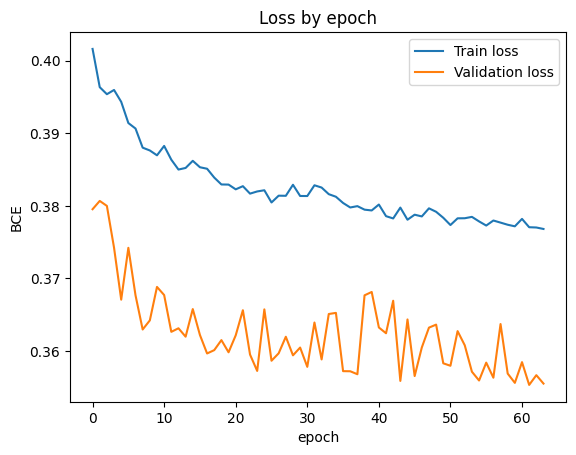

In [88]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

# Modelo con Embedding

In [89]:
len(user_id.unique()),len(product_id.unique())

(5891, 3631)

In [90]:
user_id_to_idx = {value:i for i,value in enumerate(user_id.unique())}
product_id_to_idx = {value:i for i,value in enumerate(product_id.unique())}

In [91]:
# Vector de vendor_idx en el dataset
user_idx = np.array([user_id_to_idx[value] for value in user_id])
product_idx = np.array([product_id_to_idx[value] for value in product_id])

In [92]:
# Divido el vector vendor_idx en entrenamiento y validación
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]
product_idx_train = product_idx[train_idx]
product_idx_valid = product_idx[valid_idx]

In [93]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(Dataset):

    def __init__(self, x, user_idx, product_idx, y):
        self.x = x
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.user_idx[idx],self.product_idx[idx], self.y[idx]

In [94]:
train_ds_embeddings = MyDatasetWithEmbddings(X_train, user_idx_train, product_idx_train, y_train)
valid_ds_embeddings = MyDatasetWithEmbddings(X_test, user_idx_valid, product_idx_valid, y_test)

In [95]:
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size=64)

In [108]:
# Arquitectura con embeddings
class NNetWithEmbeddings(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.embeddings_user = torch.nn.Embedding(num_embeddings=5891, embedding_dim=15)
        self.embeddings_product = torch.nn.Embedding(num_embeddings=3631, embedding_dim=10)
        self.linear_1 = torch.nn.Linear(in_features=9+15+10, out_features=200, bias=True)
        self.relu_1 = torch.nn.Tanh()
        self.drop_1 = torch.nn.Dropout(p=0.2)
        self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
        self.relu_2 = torch.nn.Tanh()
        self.drop_2 = torch.nn.Dropout(p=0.2)
        self.linear_3 = torch.nn.Linear(in_features = 100, out_features=55, bias=True)
        self.relu_3 = torch.nn.Tanh()
        self.drop_3 = torch.nn.Dropout(p=0.2)
        self.output = torch.nn.Linear(in_features = 55, out_features= 1, bias=True)

    def forward(self, x, user_idx,product_idx):
        embeddings_outputs_user = self.embeddings_user(user_idx)
        embeddings_outputs_product = self.embeddings_product(product_idx)
        x = torch.cat([x, embeddings_outputs_user, embeddings_outputs_product], dim=1)
        x = self.linear_1(x)
        x = self.relu_1(x)
        x = self.drop_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.drop_2(x)
        x = self.linear_3(x)
        x = self.relu_3(x)
        x = self.drop_3(x)
        x = self.output(x)
        return x

In [109]:
nnnetWithEmbeddings = NNetWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [110]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
# Optimizador con regularización L2 (parámetro weight_decay)
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.01) 

In [ ]:
# Mini-Batch

# cantidad de epochs
epochs = 100

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
early_stop=0
valid_accuracy=0

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
    nnnetWithEmbeddings.train(True)

    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []
  
    for i,data in enumerate(train_dataloader_emb):
        # Obtengo los datos del batch de entrenamiento
        x_batch, embed_batch, product_batch, y_batch = data
        # Copio el batch al dispositivo donde entreno la red neuronal
        x_batch = x_batch.to(device).float()
        embed_batch = embed_batch.to(device).int()
        product_batch = product_batch.to(device).int()
        y_batch = y_batch.to(device).float().reshape(-1, 1)

        # Paso forward
        # Limpio optimizer para empezar un nuevo cálculo de gradiente
        optimizer.zero_grad()
        nnet_output = nnnetWithEmbeddings(x_batch, embed_batch,product_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
    
        # Calculo el loss
        loss = loss_function(nnet_output, y_batch)

        # Backpropagation
        loss.backward()

        # Actualizar los parámetros
        optimizer.step()

        # Almaceno los valores reales y mis predicciones para cálcular las métricas
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        # Acumulo la loss del batch
        epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
    epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
    train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
    accuracy = accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
    nnnetWithEmbeddings.train(False)

    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []

    for i,data in enumerate(valid_dataloader_emb):
        # Obtengo los datos del batch de validación
        x_batch, embed_batch,product_batch, y_batch = data
        # Copio el batch al dispositivo donde entreno la red neuronal
        x_batch = x_batch.to(device).float()
        embed_batch = embed_batch.to(device).int()
        product_batch = product_batch.to(device).int()
        y_batch = y_batch.to(device).float().reshape(-1, 1)

        # Paso forward
        nnet_output = nnnetWithEmbeddings(x_batch, embed_batch,product_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
    
        # Calculo el loss
        loss = loss_function(nnet_output, y_batch)

        # En validación no hago backpropagation

        # Almaceno los valores reales y mis predicciones para cálcular las métricas
        valid_epoch_y += list(y_batch.detach().cpu().numpy())
        valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        # Acumulo la loss del batch
        valid_epoch_loss = valid_epoch_loss + loss.item()

      # Calculo la media de la loss
    valid_epoch_loss = valid_epoch_loss / n_valid
    # Almaceno la loss de la epoch para graficar
    valid_loss_by_epoch.append(valid_epoch_loss)
    # Cálculo la métrica de la epoch
    prev_acc = valid_accuracy
    valid_accuracy = accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])
    if abs(valid_accuracy-prev_acc)<0.0005:
        early_stop+=1
        if early_stop==5:
            break
    else:
        early_stop=0
    

  ############################################
  ## Impresión de resultados por epoch
  ############################################
    print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.342 / 0.276 | Train/Valid accuracy: 0.849 / 0.879
 Epoch 1 | Train/Valid loss: 0.286 / 0.274 | Train/Valid accuracy: 0.874 / 0.879
 Epoch 2 | Train/Valid loss: 0.281 / 0.274 | Train/Valid accuracy: 0.876 / 0.878
 Epoch 3 | Train/Valid loss: 0.278 / 0.272 | Train/Valid accuracy: 0.877 / 0.880
 Epoch 4 | Train/Valid loss: 0.277 / 0.274 | Train/Valid accuracy: 0.877 / 0.879
 Epoch 5 | Train/Valid loss: 0.275 / 0.271 | Train/Valid accuracy: 0.878 / 0.880
 Epoch 6 | Train/Valid loss: 0.274 / 0.271 | Train/Valid accuracy: 0.879 / 0.881
 Epoch 7 | Train/Valid loss: 0.273 / 0.268 | Train/Valid accuracy: 0.879 / 0.882
 Epoch 8 | Train/Valid loss: 0.272 / 0.269 | Train/Valid accuracy: 0.880 / 0.881
 Epoch 9 | Train/Valid loss: 0.272 / 0.270 | Train/Valid accuracy: 0.880 / 0.881
 Epoch 10 | Train/Valid loss: 0.271 / 0.268 | Train/Valid accuracy: 0.879 / 0.881
 Epoch 11 | Train/Valid loss: 0.270 / 0.267 | Train/Valid accuracy: 0.881 / 0.882
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

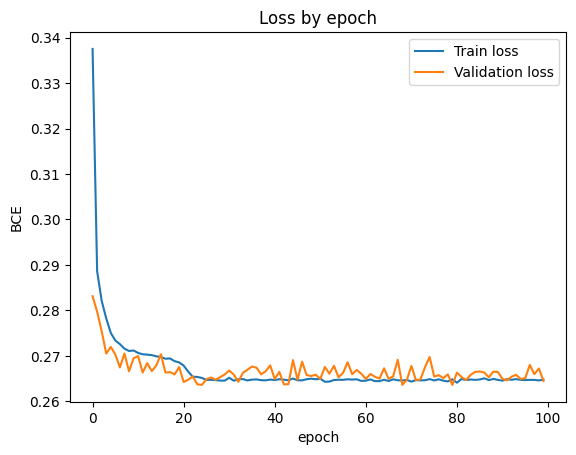

In [100]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

El entrenamiento con embeddings dio mejores resultados en accuracy y en loss, siendo esta mas baja. Pero esto es a costo de mayor tiempo de entrenamiento, fue mucho mas lo que demoró con embeddings que sin embeddings.